In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

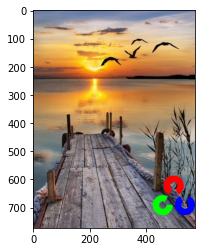

In [2]:
kucukResim = cv2.imread('DATA/opencv-logo-white.png')
buyukResim = cv2.imread('DATA/18_view.jpg')
kucukResim = cv2.cvtColor(kucukResim, cv2.COLOR_BGR2RGB)
buyukResim = cv2.cvtColor(buyukResim, cv2.COLOR_BGR2RGB)

kYukseklik, kGenislik, kKanal = kucukResim.shape
bYukseklik, bGenislik, bKanal = buyukResim.shape

roi_alan = buyukResim[bYukseklik-kYukseklik:, bGenislik - kGenislik:].copy()
kucukResimGray = cv2.cvtColor(kucukResim, cv2.COLOR_RGB2GRAY)
ret, maske = cv2.threshold(kucukResimGray, 10, 255, cv2.THRESH_BINARY)
maske_tersi = cv2.bitwise_not(maske)
roi_alan_bg = cv2.bitwise_and(roi_alan, roi_alan, mask = maske_tersi)
roi_alan_fg = cv2.bitwise_and(kucukResim, kucukResim, mask = maske)

birlesmisParca = cv2.add(roi_alan_bg, roi_alan_fg)
buyukResim[bYukseklik-kYukseklik:, bGenislik - kGenislik:] = birlesmisParca
plt.imshow(buyukResim)